<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/electrodynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

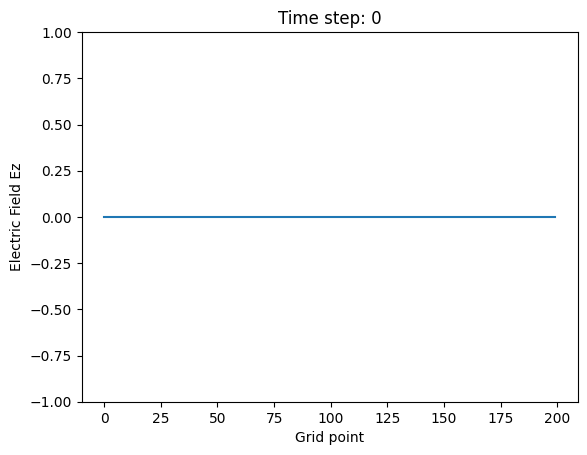

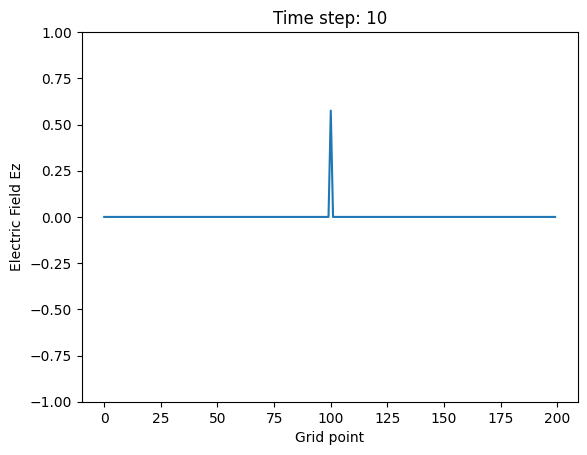

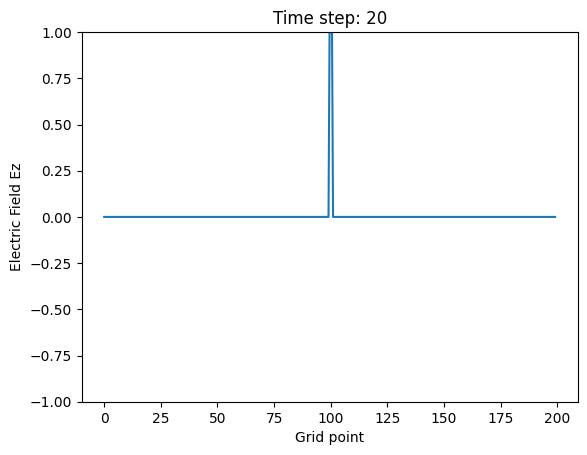

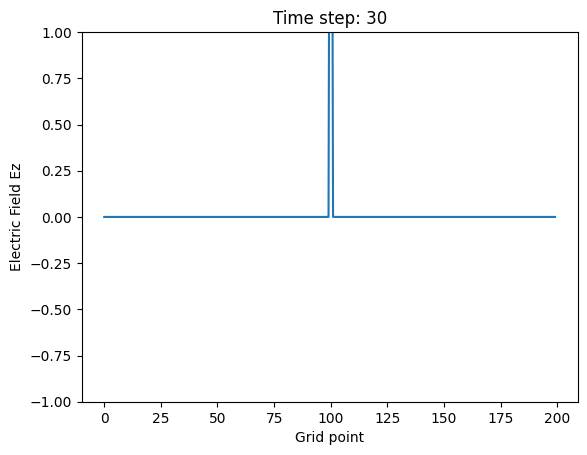

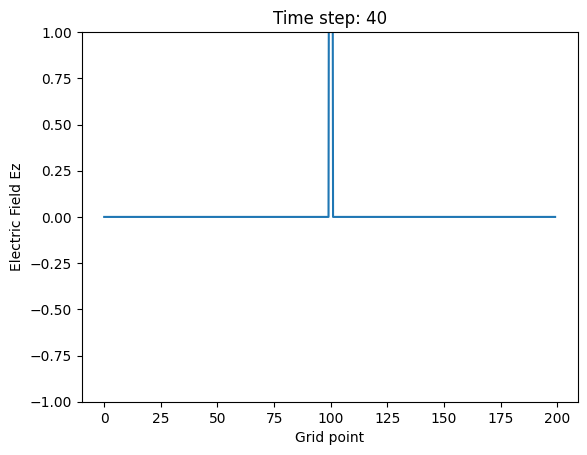

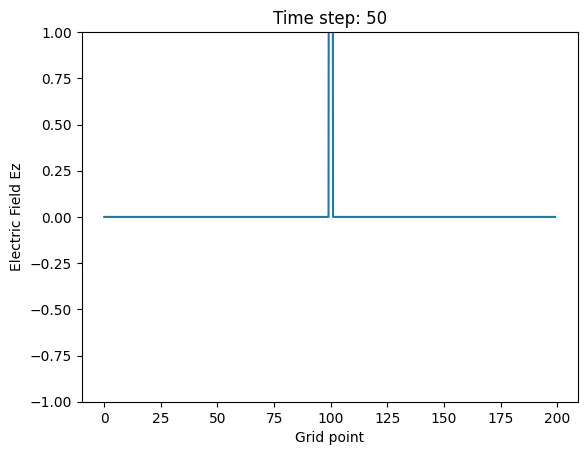

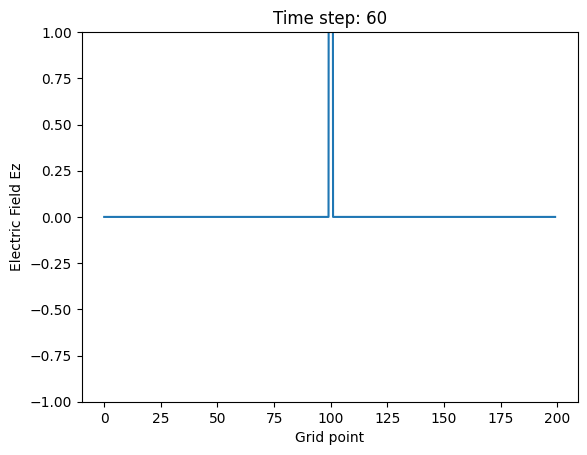

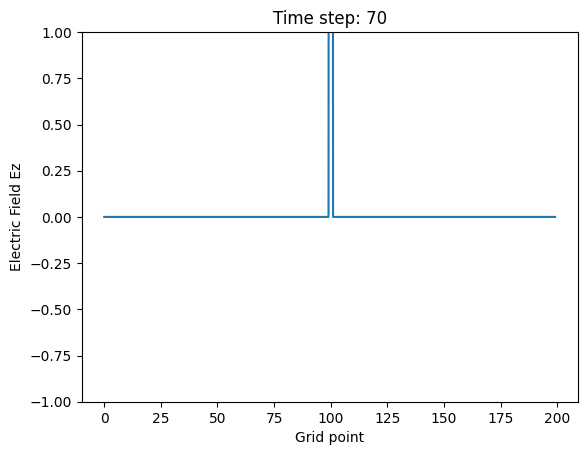

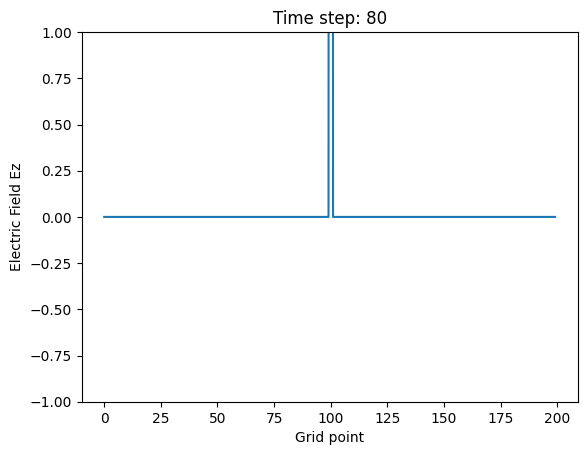

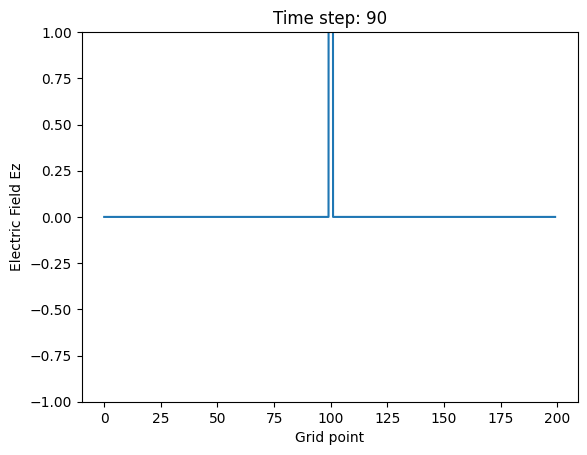

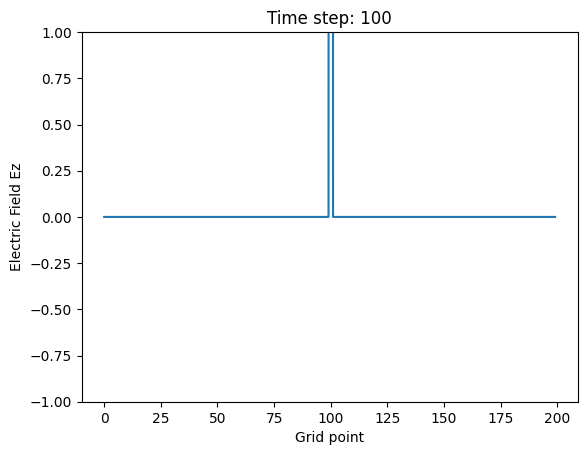

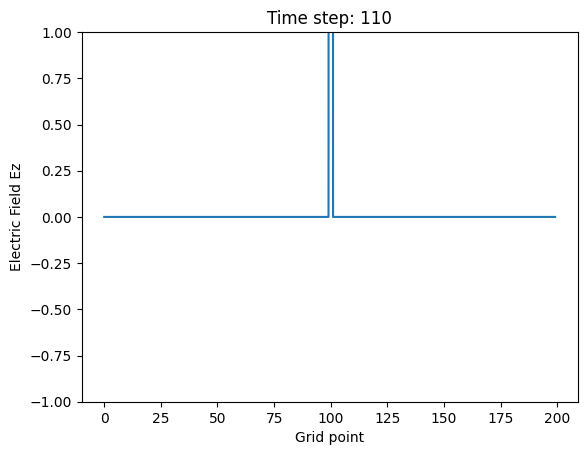

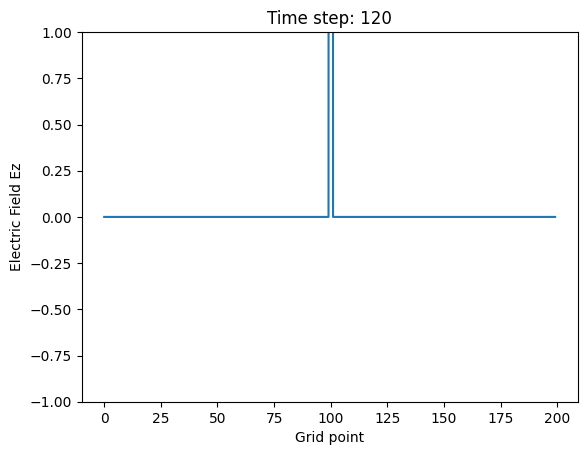

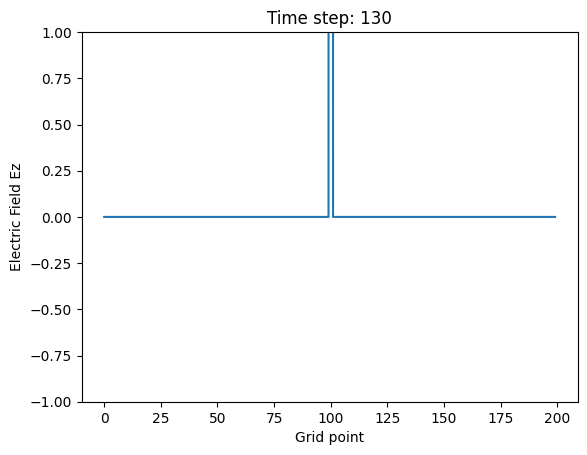

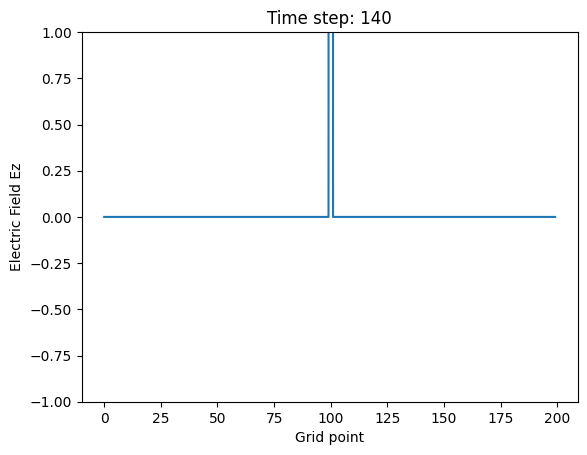

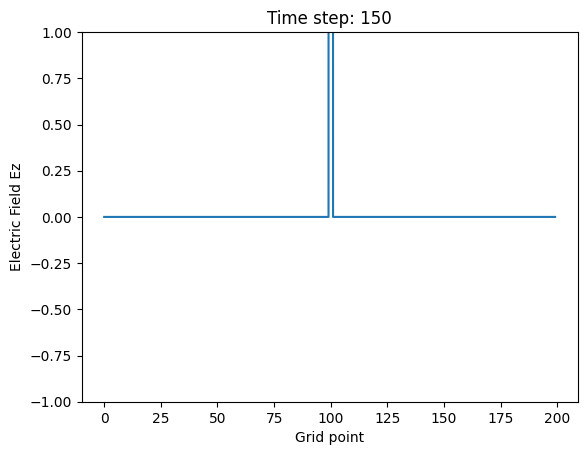

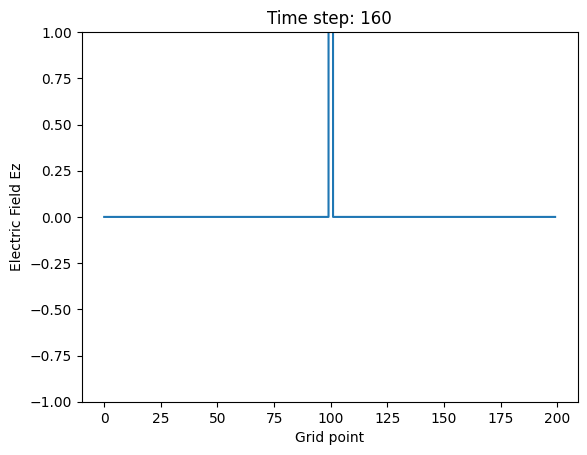

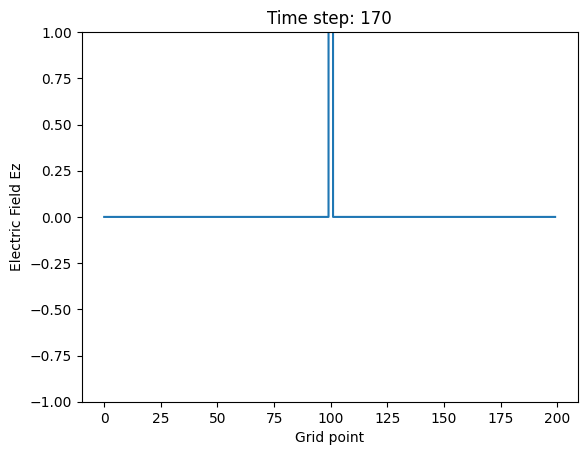

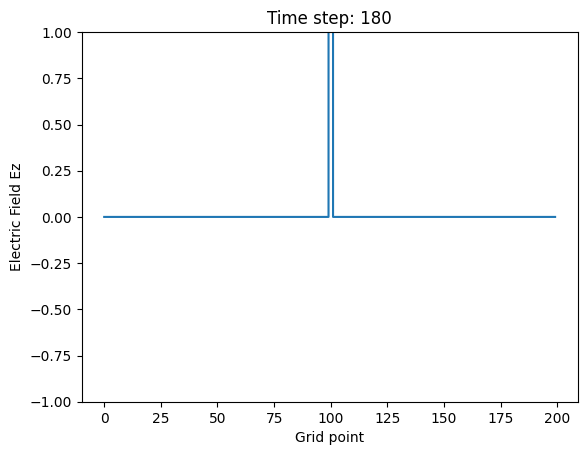

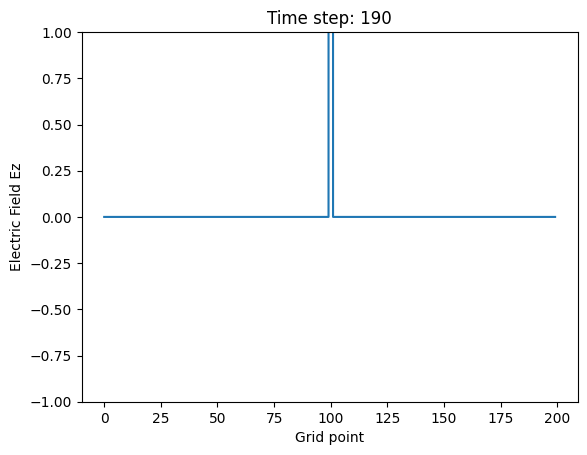

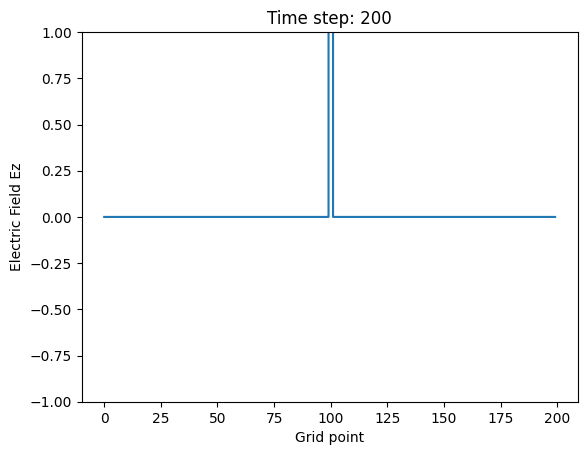

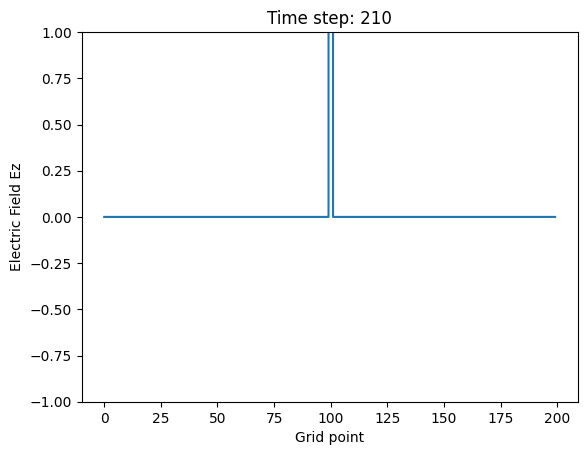

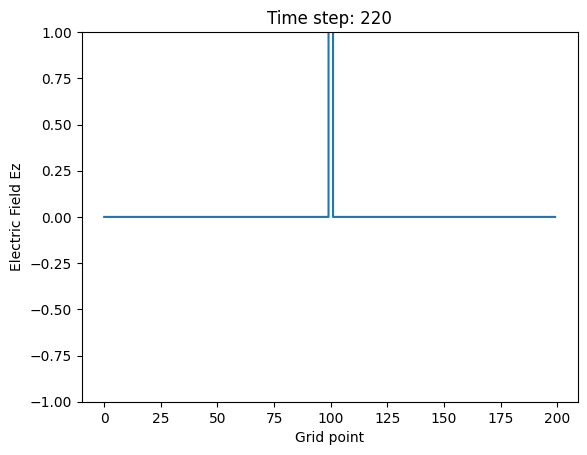

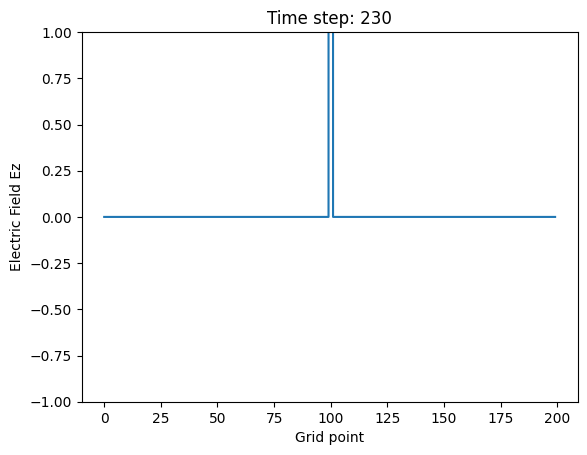

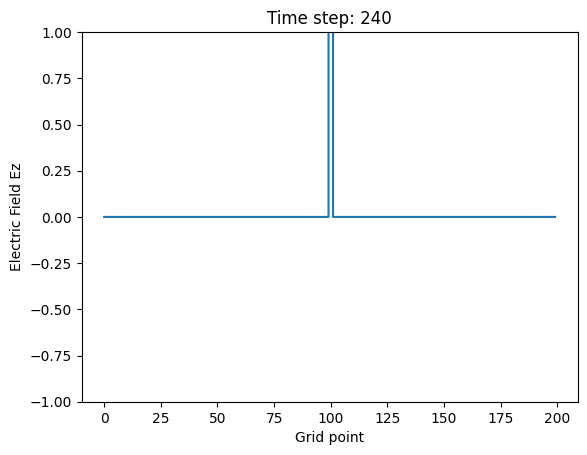

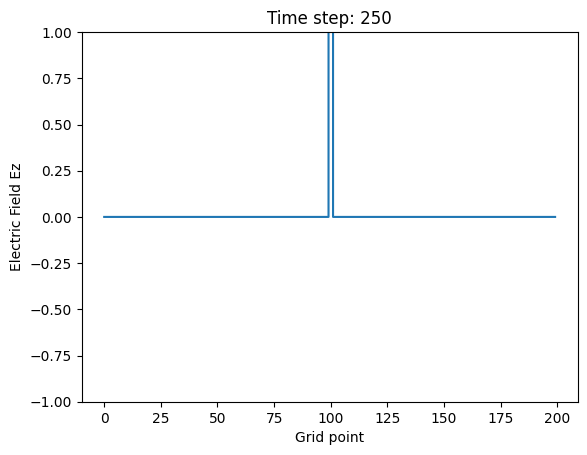

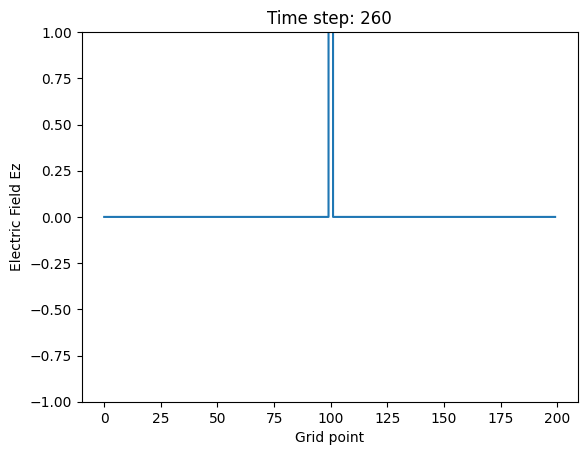

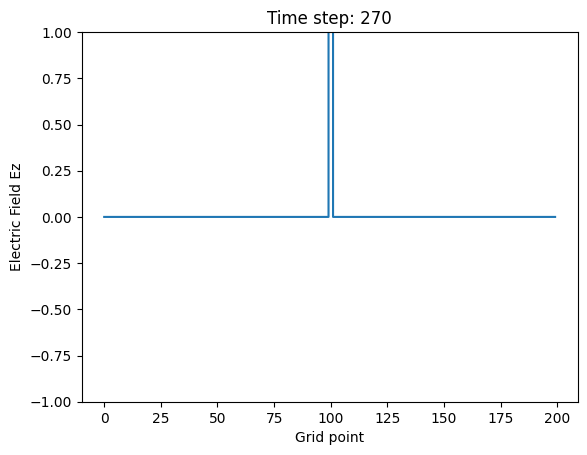

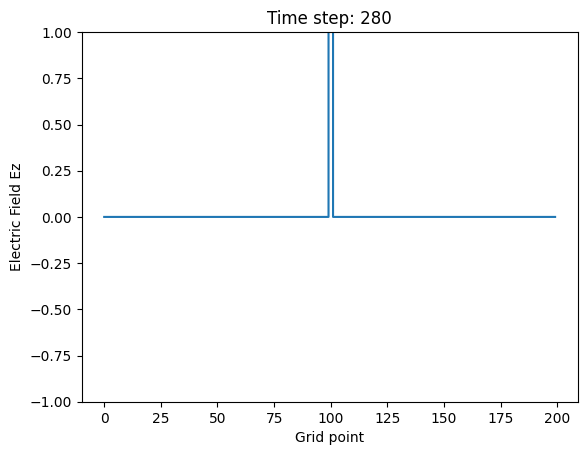

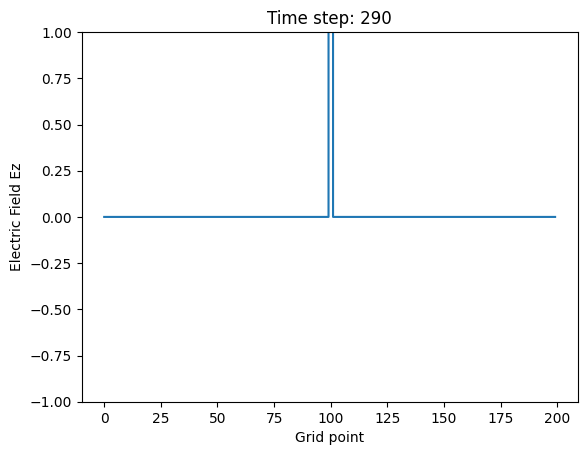

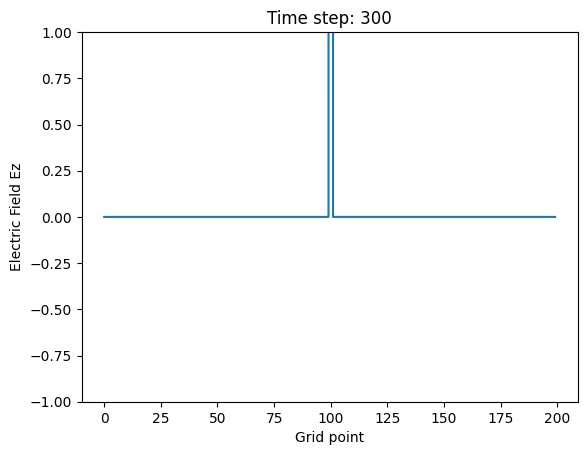

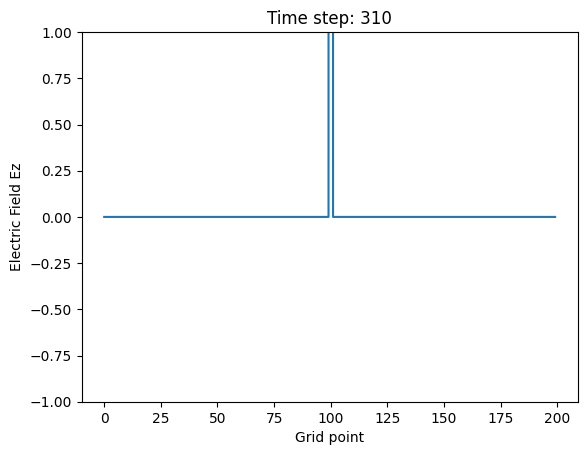

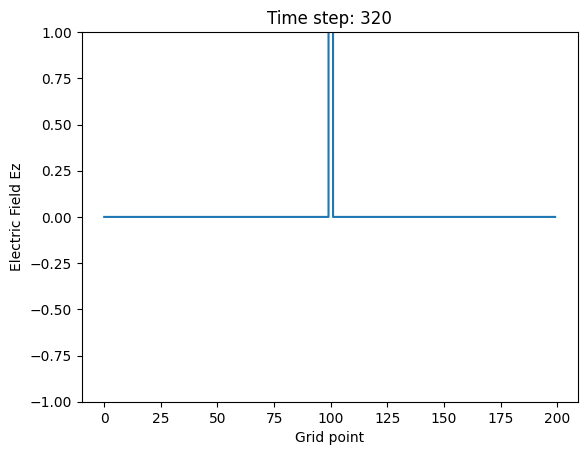

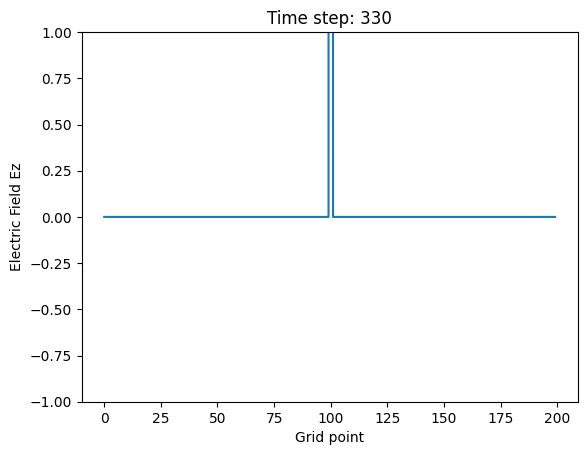

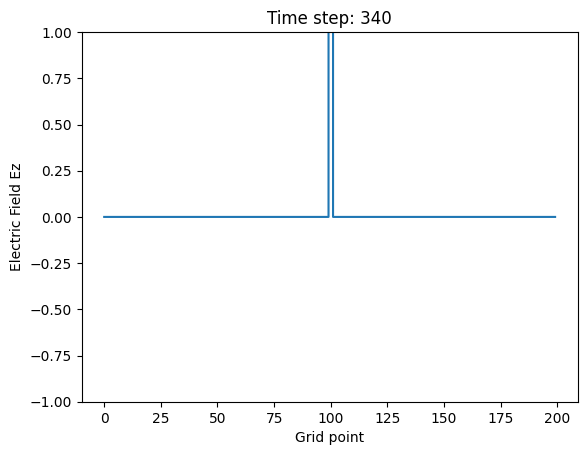

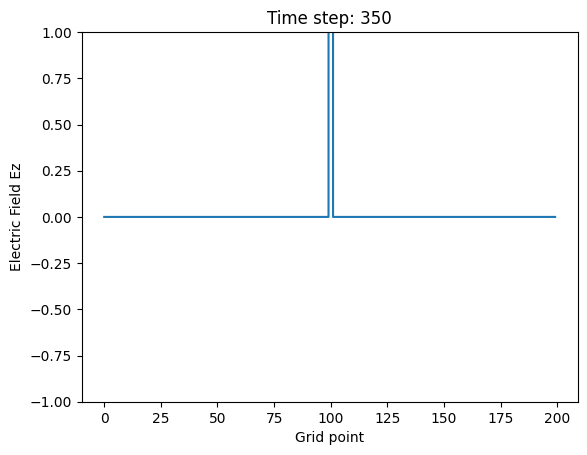

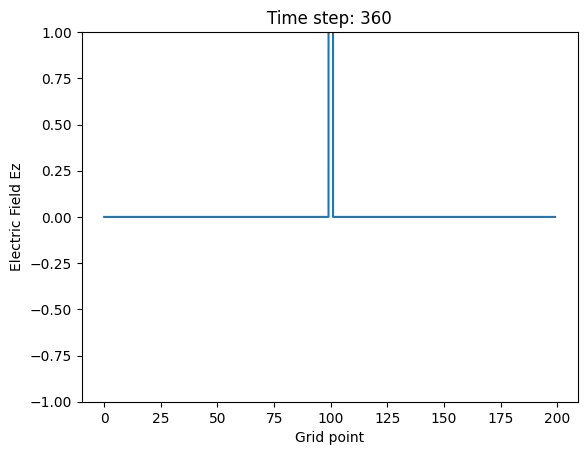

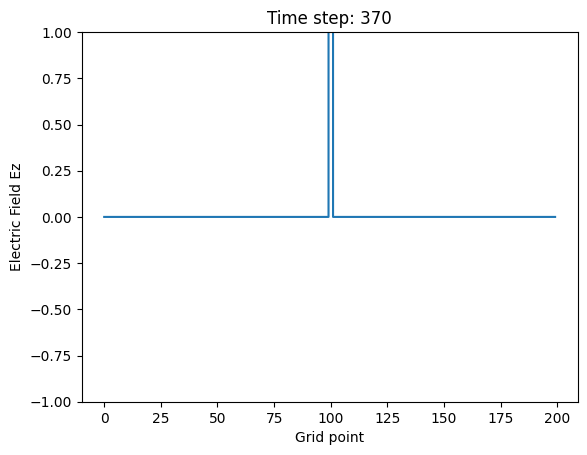

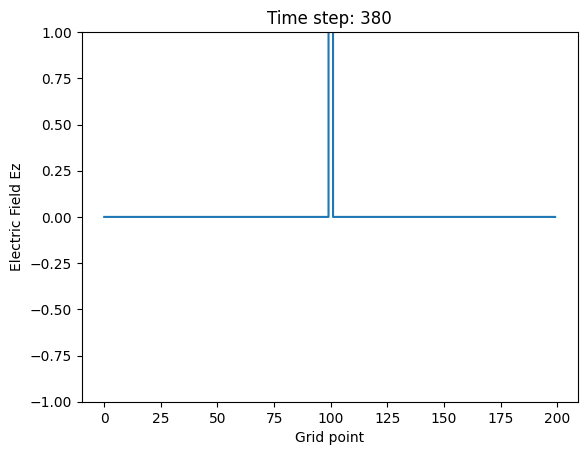

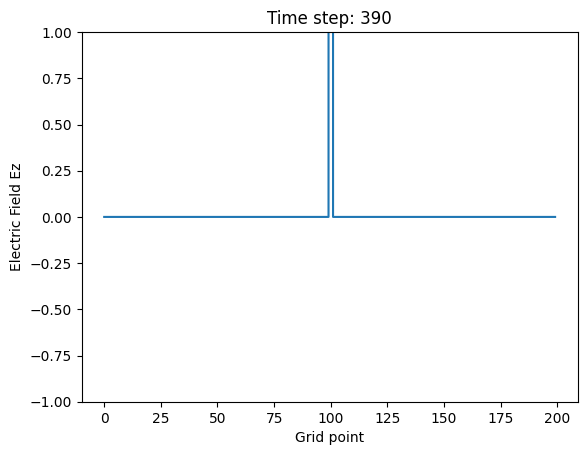

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 3e8                # Speed of light in vacuum
dx = 1e-3              # Space step
dt = dx / (2 * c)      # Time step (stability condition)
L = 200                # Length of the simulation domain
time_steps = 400       # Number of time steps

Ez = np.zeros(L)       # Electric field
Hy = np.zeros(L)       # Magnetic field

# Main FDTD loop
for t in range(time_steps):
    # Update magnetic field
    for i in range(L - 1):
        Hy[i] += (Ez[i + 1] - Ez[i]) * dt / dx

    # Update electric field
    for i in range(1, L):
        Ez[i] += (Hy[i] - Hy[i - 1]) * dt / dx

    # Source (simple sinusoidal source at the center)
    Ez[L // 2] += np.sin(2 * np.pi * 1e9 * t * dt)

    # Plot every 10 time steps
    if t % 10 == 0:
        plt.clf()
        plt.plot(Ez, label="Ez field")
        plt.ylim(-1, 1)
        plt.xlabel("Grid point")
        plt.ylabel("Electric Field Ez")
        plt.title(f"Time step: {t}")
        plt.pause(0.01)

plt.show()


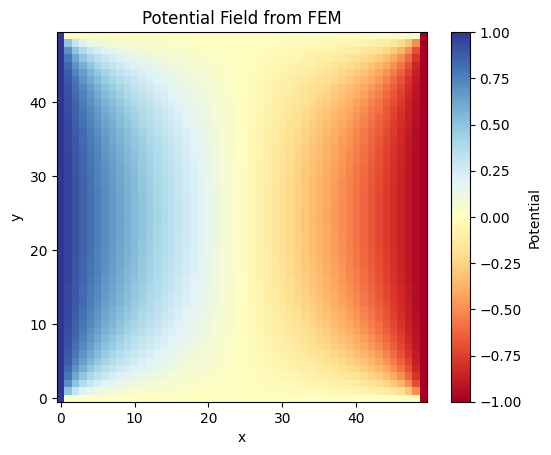

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Parameters
nx, ny = 50, 50
V = np.zeros((nx, ny))

# Boundary conditions (e.g., fixed potentials at edges)
V[:, 0] = 1   # Left boundary
V[:, -1] = -1 # Right boundary

# Build coefficient matrix for Laplace's equation using FEM
A = lil_matrix((nx*ny, nx*ny))
b = np.zeros(nx * ny)

# Fill matrix based on finite element discretization
for i in range(1, nx-1):
    for j in range(1, ny-1):
        idx = i * ny + j
        A[idx, idx] = -4
        A[idx, idx-1] = 1
        A[idx, idx+1] = 1
        A[idx, idx-ny] = 1
        A[idx, idx+ny] = 1

# Apply boundary conditions
for i in range(nx):
    for j in range(ny):
        if i == 0 or i == nx-1 or j == 0 or j == ny-1:
            idx = i * ny + j
            A[idx, idx] = 1
            b[idx] = V[i, j]

# Solve
V_flat = spsolve(A.tocsc(), b)
V = V_flat.reshape((nx, ny))

# Plot result
plt.imshow(V, cmap="RdYlBu", origin="lower")
plt.colorbar(label="Potential")
plt.title("Potential Field from FEM")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


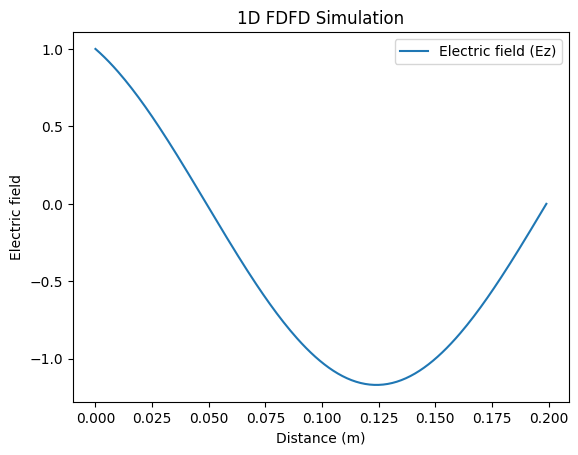

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Parameters
L = 200                  # Number of grid points
dx = 1e-3                # Space step
freq = 1e9               # Frequency (1 GHz)
c = 3e8                  # Speed of light
k = 2 * np.pi * freq / c # Wavenumber

# Coefficient matrix for finite difference
A = np.zeros((L, L))
b = np.zeros(L)

# Define finite-difference matrix
for i in range(1, L - 1):
    A[i, i-1] = 1
    A[i, i] = -2 + (dx ** 2 * k ** 2)
    A[i, i+1] = 1

# Boundary conditions
A[0, 0] = A[L-1, L-1] = 1
b[0] = 1  # Incident wave at the left boundary

# Solve for electric field distribution
E = solve(A, b)

# Plot result
plt.plot(np.arange(L) * dx, E, label="Electric field (Ez)")
plt.xlabel("Distance (m)")
plt.ylabel("Electric field")
plt.title("1D FDFD Simulation")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


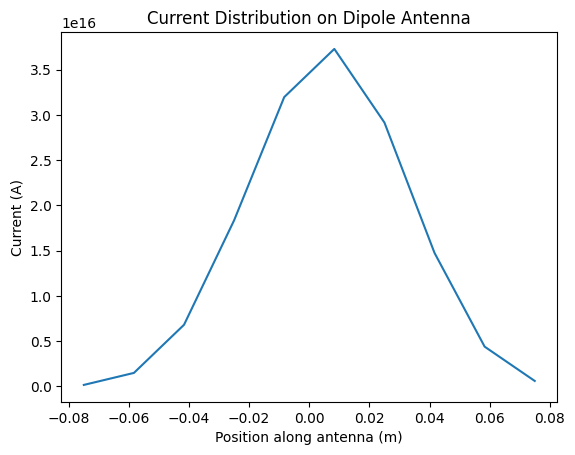

In [4]:
import numpy as np
from scipy.integrate import quad
from scipy.constants import c, epsilon_0

# Antenna parameters
freq = 1e9             # 1 GHz
wavelength = c / freq
length = wavelength / 2  # Half-wavelength dipole
num_segments = 10       # Discretization segments

# Build impedance matrix
Z = np.zeros((num_segments, num_segments), dtype=complex)
for m in range(num_segments):
    for n in range(num_segments):
        def integrand(z):
            r = np.abs((m - n) * length / num_segments + z - 0.5)
            return np.exp(-1j * 2 * np.pi / wavelength * r) / r
        Z[m, n], _ = quad(integrand, -length/2, length/2)

# Voltage vector
V = np.zeros(num_segments, dtype=complex)
V[num_segments//2] = 1  # Driving voltage at the center

# Solve for currents
I = np.linalg.solve(Z, V)

# Plot current distribution
plt.plot(np.linspace(-length/2, length/2, num_segments), np.abs(I))
plt.xlabel("Position along antenna (m)")
plt.ylabel("Current (A)")
plt.title("Current Distribution on Dipole Antenna")
plt.show()


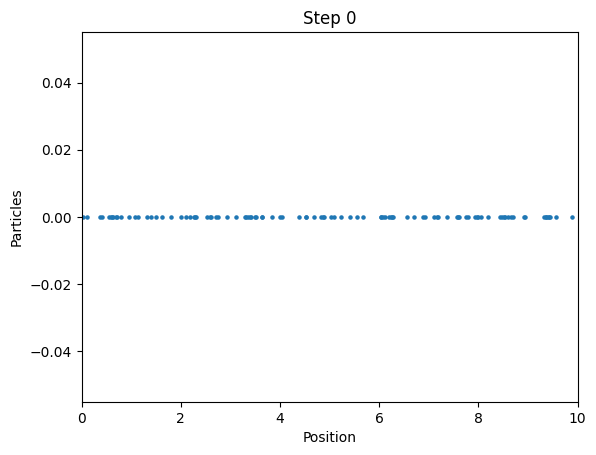

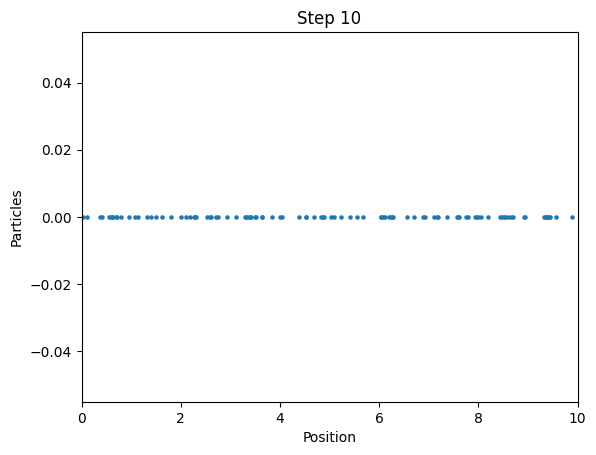

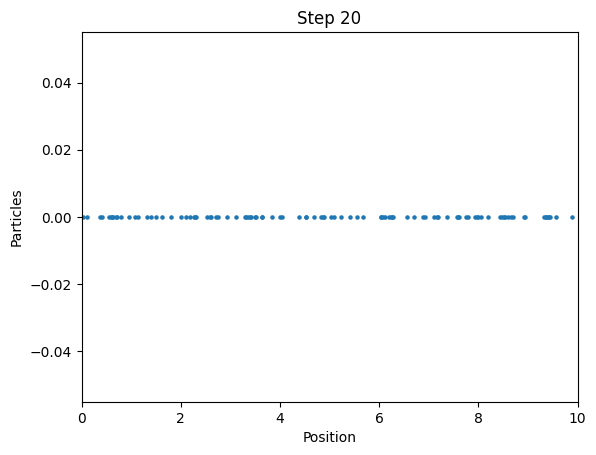

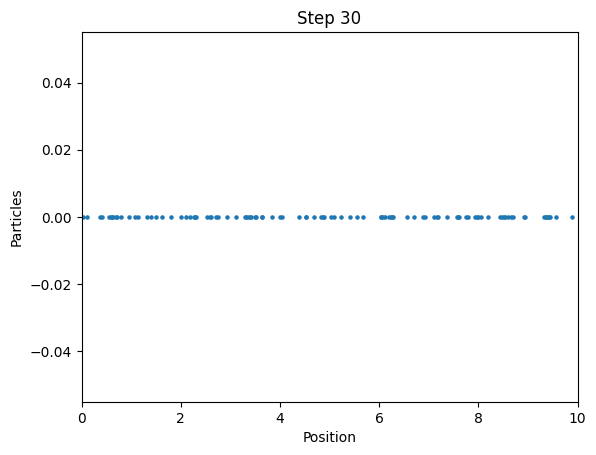

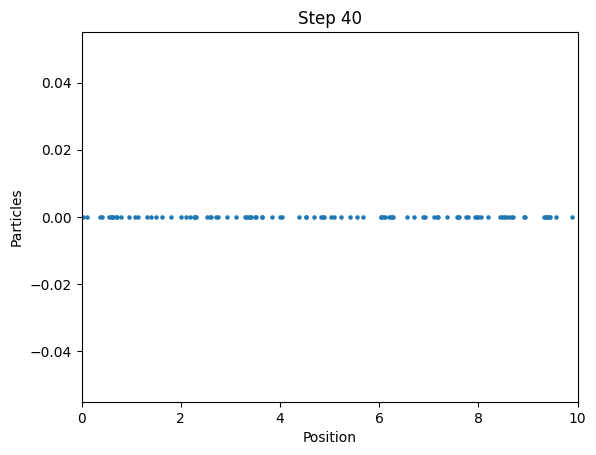

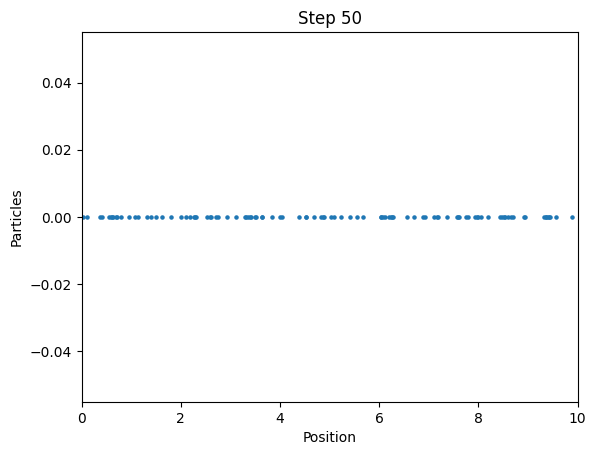

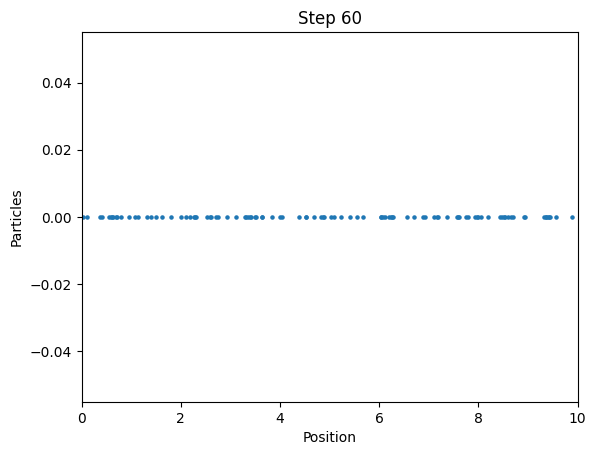

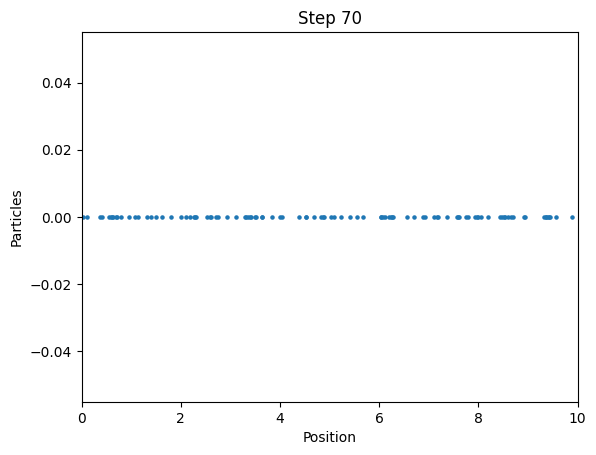

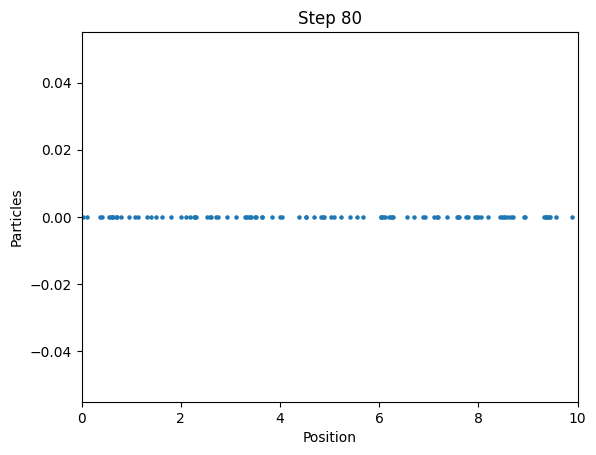

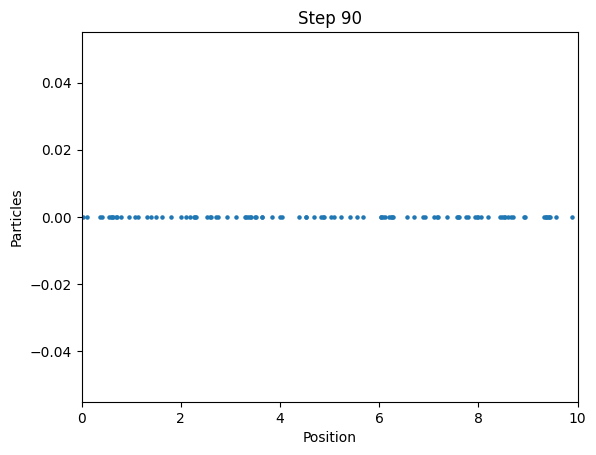

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_particles = 100
num_steps = 100
dt = 0.01  # Time step

# Initialize particles
positions = np.random.rand(num_particles) * 10  # Random initial positions
velocities = np.zeros(num_particles)
charges = np.ones(num_particles) * 1.6e-19  # Particle charge

# Static electric field (e.g., linear field)
E_field = np.linspace(0, 1e5, num_particles)

# PIC loop
for step in range(num_steps):
    # Update velocities
    for i in range(num_particles):
        velocities[i] += charges[i] * E_field[i] * dt

    # Update positions
    positions += velocities * dt

    # Plot positions every 10 steps
    if step % 10 == 0:
        plt.clf()
        plt.scatter(positions, np.zeros(num_particles), s=5)
        plt.xlim(0, 10)
        plt.xlabel("Position")
        plt.ylabel("Particles")
        plt.title(f"Step {step}")
        plt.pause(0.1)

plt.show()
